In [1]:
import pandas as pd
import numpy as np

# Part 1: Advanced Data Cleaning

# Load temperatures data of the Corn belt
temperature_df = pd.read_csv('cornbelt_data2.csv')
temperature_df

,station,day,max_temp_f,min_temp_f,precip_in,snow_in,Region
0,HLC,1990-01-01,51.0,17.0,0.0,NaN,KANSAS
1,FLV,1990-01-01,36.0,16.0,0.0,NaN,KANSAS
2,DDC,1990-01-01,55.0,19.0,0.0,NaN,KANSAS
3,TOP,1990-01-01,38.0,15.0,0.0,NaN,KANSAS
4,HUT,1990-01-01,42.0,5.0,0.0,NaN,KANSAS
...,...,...,...,...,...,...,...
4482067,MPZ,2020-12-31,30.2,19.4,NaN,NaN,IOWA
4482068,VTI,2020-12-31,28.2,18.5,NaN,NaN,IOWA
4482069,PRO,2020-12-31,23.7,10.9,NaN,NaN,IOWA
4482070,BRL,2020-12-31,28.0,21.0,0.0,NaN,IOWA


In [2]:
temperature_df.shape

(4482072, 7)

In [3]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4482072 entries, 0 to 4482071
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   station     object 
 1   day         object 
 2   max_temp_f  float64
 3   min_temp_f  float64
 4   precip_in   float64
 5   snow_in     float64
 6   Region      object 
dtypes: float64(4), object(3)
memory usage: 239.4+ MB


In [4]:
# Converting 'day' to datetime
temperature_df['day'] = pd.to_datetime(temperature_df['day'])

# Converting 'region' to category
temperature_df['Region'] = temperature_df['Region'].astype('category')

In [5]:
# Conversion of unit measures of the dataset
# From Fahrenheit to Celsius Degree

# Conversion of maximum temperatures
temperature_df['max_temp_c'] = (5/9) * (temperature_df['max_temp_f']-32) 

# Conversion of minimum temperatures
temperature_df['min_temp_c'] = (5/9) * (temperature_df['min_temp_f']-32) 

# Convert daily precipitation from inches to centimeters
temperature_df['precip_cm'] = temperature_df['precip_in'] * 2.54

# Convert snowfall from inches to centimeters
temperature_df['snow_cm'] = temperature_df['snow_in'] * 2.54

# Drop the original columns 
temperature_df.drop(columns=['max_temp_f', 'min_temp_f', 'precip_in', 'snow_in'], inplace=True)

temperature_df


,station,day,Region,max_temp_c,min_temp_c,precip_cm,snow_cm
0,HLC,1990-01-01,KANSAS,10.555556,-8.333333,0.0,NaN
1,FLV,1990-01-01,KANSAS,2.222222,-8.888889,0.0,NaN
2,DDC,1990-01-01,KANSAS,12.777778,-7.222222,0.0,NaN
3,TOP,1990-01-01,KANSAS,3.333333,-9.444444,0.0,NaN
4,HUT,1990-01-01,KANSAS,5.555556,-15.000000,0.0,NaN
...,...,...,...,...,...,...,...
4482067,MPZ,2020-12-31,IOWA,-1.000000,-7.000000,NaN,NaN
4482068,VTI,2020-12-31,IOWA,-2.111111,-7.500000,NaN,NaN
4482069,PRO,2020-12-31,IOWA,-4.611111,-11.722222,NaN,NaN
4482070,BRL,2020-12-31,IOWA,-2.222222,-6.111111,0.0,NaN


In [6]:
temperature_df.describe()

,day,max_temp_c,min_temp_c,precip_cm,snow_cm
count,4482072,4.343487e+06,4.343714e+06,3.657619e+06,192552.000000
mean,2008-01-04 15:25:52.611203072,1.525195e+01,4.107185e+00,1.989757e-01,-1.246682
min,1990-01-01 00:00:00,-5.572778e+03,-9.911111e+02,0.000000e+00,-251.460000
25%,2001-06-09 00:00:00,5.388889e+00,-3.333333e+00,0.000000e+00,0.000000
50%,2008-11-08 00:00:00,1.700000e+01,4.444444e+00,0.000000e+00,0.000000
75%,2015-05-01 00:00:00,2.600000e+01,1.333333e+01,2.540000e-02,0.000000
max,2020-12-31 00:00:00,1.100000e+02,3.777778e+01,1.214907e+03,25397.460000
std,NaN,1.355786e+01,1.143465e+01,1.581494e+00,86.583739


In [7]:
# Check for missing values
missing_values = temperature_df.isnull().sum()

# Calculate percentage of missing values for each column
total_rows = len(temperature_df)
missing_percentage = (missing_values / total_rows) * 100

# Create a DataFrame to display missing values and their percentages
missing_data_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data_summary)

            Missing Values  Percentage
station                  0    0.000000
day                      0    0.000000
Region                   0    0.000000
max_temp_c          138585    3.091985
min_temp_c          138358    3.086921
precip_cm           824453   18.394461
snow_cm            4289520   95.703951


In [8]:
#checking duplicate values 
dupl_values = temperature_df.nunique()

# Calculate percentage of missing values for each column
total_rows = len(temperature_df)
duplicate_percentage = (dupl_values / total_rows) * 100

# Create a DataFrame to display missing values and their percentages
duplicate_data_summary = pd.DataFrame({'Duplicate Values': dupl_values, 'Percentage': duplicate_percentage})
print(duplicate_data_summary)

            Duplicate Values  Percentage
station                  573    0.012784
day                    11323    0.252629
Region                    10    0.000223
max_temp_c              1441    0.032150
min_temp_c              1340    0.029897
precip_cm               1308    0.029183
snow_cm                  164    0.003659


In [9]:
# Fill missing values with the median or mean
median_max_temperature = temperature_df['max_temp_c'].median()
temperature_df['max_temp_c'] = temperature_df['max_temp_c'].fillna(median_max_temperature)

median_min_temperature = temperature_df['min_temp_c'].median()
temperature_df['min_temp_c'] = temperature_df['min_temp_c'].fillna(median_min_temperature)

median_precip = temperature_df['precip_cm'].median()
temperature_df['precip_cm'] = temperature_df['precip_cm'].fillna(median_precip)

median_snow = temperature_df['snow_cm'].median()
temperature_df['snow_cm'] = temperature_df['snow_cm'].fillna(median_snow)

temperature_df

,station,day,Region,max_temp_c,min_temp_c,precip_cm,snow_cm
0,HLC,1990-01-01,KANSAS,10.555556,-8.333333,0.0,0.0
1,FLV,1990-01-01,KANSAS,2.222222,-8.888889,0.0,0.0
2,DDC,1990-01-01,KANSAS,12.777778,-7.222222,0.0,0.0
3,TOP,1990-01-01,KANSAS,3.333333,-9.444444,0.0,0.0
4,HUT,1990-01-01,KANSAS,5.555556,-15.000000,0.0,0.0
...,...,...,...,...,...,...,...
4482067,MPZ,2020-12-31,IOWA,-1.000000,-7.000000,0.0,0.0
4482068,VTI,2020-12-31,IOWA,-2.111111,-7.500000,0.0,0.0
4482069,PRO,2020-12-31,IOWA,-4.611111,-11.722222,0.0,0.0
4482070,BRL,2020-12-31,IOWA,-2.222222,-6.111111,0.0,0.0


In [10]:
temperature_df.describe()

,day,max_temp_c,min_temp_c,precip_cm,snow_cm
count,4482072,4.482072e+06,4.482072e+06,4.482072e+06,4.482072e+06
mean,2008-01-04 15:25:52.611203072,1.530600e+01,4.117596e+00,1.623752e-01,-5.355805e-02
min,1990-01-01 00:00:00,-5.572778e+03,-9.911111e+02,0.000000e+00,-2.514600e+02
25%,2001-06-09 00:00:00,6.000000e+00,-3.000000e+00,0.000000e+00,0.000000e+00
50%,2008-11-08 00:00:00,1.700000e+01,4.444444e+00,0.000000e+00,0.000000e+00
75%,2015-05-01 00:00:00,2.561111e+01,1.322222e+01,2.540000e-04,0.000000e+00
max,2020-12-31 00:00:00,1.100000e+02,3.777778e+01,1.214907e+03,2.539746e+04
std,NaN,1.335004e+01,1.125693e+01,1.430734e+00,1.794787e+01


In [11]:
# Load historical data of corn futures

futures_df = pd.read_excel(r'C:/Users/sdama/Desktop/HEC Lausanne - MSc Finance/2° SEMESTER/ADA/progetto/DATA/CORN PRICES/Prices_Corn_Futures_1984_2024.xlsx')

futures_df

,Date,CBT-CORN COMP. TRc1 - SETT. PRICE
0,1984-04-19,357.50
1,1984-04-20,357.50
2,1984-04-23,361.25
3,1984-04-24,351.50
4,1984-04-25,347.50
...,...,...
10432,2024-04-15,431.50
10433,2024-04-16,431.00
10434,2024-04-17,430.25
10435,2024-04-18,426.75


In [12]:
futures_df['day'] = futures_df['Date']
futures_df['Price'] = futures_df['CBT-CORN COMP. TRc1 - SETT. PRICE']
futures_df.drop(columns=['Date', 'CBT-CORN COMP. TRc1 - SETT. PRICE'], inplace=True)
futures_df

,day,Price
0,1984-04-19,357.50
1,1984-04-20,357.50
2,1984-04-23,361.25
3,1984-04-24,351.50
4,1984-04-25,347.50
...,...,...
10432,2024-04-15,431.50
10433,2024-04-16,431.00
10434,2024-04-17,430.25
10435,2024-04-18,426.75


In [13]:
# Filter rows: start date is from 1990

futures_df['day'] = pd.to_datetime(futures_df['day'])

futures_df = futures_df[(futures_df['day'].dt.year >= 1990) & (futures_df['day'].dt.year <= 2020)]

futures_df


,day,Price
1487,1990-01-01,239.75
1488,1990-01-02,237.75
1489,1990-01-03,238.50
1490,1990-01-04,238.25
1491,1990-01-05,237.75
...,...,...
9571,2020-12-25,451.00
9572,2020-12-28,456.50
9573,2020-12-29,466.00
9574,2020-12-30,474.50


In [14]:
temperature_df['day'] = pd.to_datetime(temperature_df['day'])

# Assuming financial_df contains financial data and temp_df contains temperature data
# Both DataFrames have a 'date' column

# Merge using an outer join to keep all records
merged_df = pd.merge(futures_df, temperature_df, on='day', how='outer', sort=True)

# Now, merged_df will contain NaNs for financial data on weekends
merged_df


,day,Price,station,Region,max_temp_c,min_temp_c,precip_cm,snow_cm
0,1990-01-01,239.75,HLC,KANSAS,10.555556,-8.333333,0.0,0.0
1,1990-01-01,239.75,FLV,KANSAS,2.222222,-8.888889,0.0,0.0
2,1990-01-01,239.75,DDC,KANSAS,12.777778,-7.222222,0.0,0.0
3,1990-01-01,239.75,TOP,KANSAS,3.333333,-9.444444,0.0,0.0
4,1990-01-01,239.75,HUT,KANSAS,5.555556,-15.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
4482067,2020-12-31,484.00,MPZ,IOWA,-1.000000,-7.000000,0.0,0.0
4482068,2020-12-31,484.00,VTI,IOWA,-2.111111,-7.500000,0.0,0.0
4482069,2020-12-31,484.00,PRO,IOWA,-4.611111,-11.722222,0.0,0.0
4482070,2020-12-31,484.00,BRL,IOWA,-2.222222,-6.111111,0.0,0.0


In [15]:
merged_df['avg_temp_c'] = (merged_df['max_temp_c'] + merged_df['min_temp_c'])/2

In [16]:
# Forward fill financial data for weekends
merged_df['Price'] = merged_df['Price'].ffill()

In [17]:
# Fill missing values with the median or mean
merged_df['avg_temp_c'] = merged_df['avg_temp_c'].fillna(merged_df['avg_temp_c'].median())


In [18]:
# Drop column "snow_cm"
columns_to_drop = ['snow_cm','max_temp_c','min_temp_c']
merged_df.drop(columns=columns_to_drop, axis=1, inplace=True)

merged_df

,day,Price,station,Region,precip_cm,avg_temp_c
0,1990-01-01,239.75,HLC,KANSAS,0.0,1.111111
1,1990-01-01,239.75,FLV,KANSAS,0.0,-3.333333
2,1990-01-01,239.75,DDC,KANSAS,0.0,2.777778
3,1990-01-01,239.75,TOP,KANSAS,0.0,-3.055556
4,1990-01-01,239.75,HUT,KANSAS,0.0,-4.722222
...,...,...,...,...,...,...
4482067,2020-12-31,484.00,MPZ,IOWA,0.0,-4.000000
4482068,2020-12-31,484.00,VTI,IOWA,0.0,-4.805556
4482069,2020-12-31,484.00,PRO,IOWA,0.0,-8.166667
4482070,2020-12-31,484.00,BRL,IOWA,0.0,-4.166667


In [19]:
# # Calculate IQR for the first variable
# Q1_price = merged_df['Price'].quantile(0.25)
# Q3_price = merged_df['Price'].quantile(0.75)
# IQR_price = Q3_price - Q1_price

# # Calculate IQR for the second variable
# Q1_temp = merged_df['avg_temp_c'].quantile(0.25)
# Q3_temp = merged_df['avg_temp_c'].quantile(0.75)
# IQR_temp = Q3_temp - Q1_temp

# # Define a filter for outliers for each variable
# outliers_price = (merged_df['Price'] < (Q1_price - 1.5 * IQR_price)) | (merged_df['Price'] > (Q3_price + 1.5 * IQR_price))
# outliers_temp = (merged_df['avg_temp_c'] < (Q1_temp - 1.5 * IQR_temp)) | (merged_df['avg_temp_c'] > (Q3_temp + 1.5 * IQR_temp))

# # Combine the filters using the bitwise OR operator if you want to exclude rows that are outliers in either column
# # or use the bitwise AND operator (&) to exclude rows that are outliers in both columns simultaneously.
# outliers_combined = outliers_price & outliers_temp

# # Apply the filter to the DataFrame
# df_cleaned = merged_df[~outliers_combined]
# df_cleaned

In [20]:
merged_df.describe()

,day,Price,precip_cm,avg_temp_c
count,4482072,4.482072e+06,4.482072e+06,4.482072e+06
mean,2008-01-04 15:25:52.611202816,3.572736e+02,1.623752e-01,9.711796e+00
min,1990-01-01 00:00:00,1.747500e+02,0.000000e+00,-2.784167e+03
25%,2001-06-09 00:00:00,2.387500e+02,0.000000e+00,1.411111e+00
50%,2008-11-08 00:00:00,3.502500e+02,0.000000e+00,1.072222e+01
75%,2015-05-01 00:00:00,3.935000e+02,2.540000e-04,1.944444e+01
max,2020-12-31 00:00:00,8.312500e+02,1.214907e+03,6.000000e+01
std,NaN,1.424658e+02,1.430734e+00,1.180431e+01


In [21]:
# Store the dataset cleaned in a HDF5 format
# Use pandas to_hdf() to handle complex dtypes
merged_df.to_hdf('data.h5', key='dataset', mode='w', format='table')


In [22]:
# Access dataset
df_final = pd.read_hdf('data.h5', 'dataset')
# Identify numeric columns with select_dtypes
numeric_cols = df_final.select_dtypes(include=['float64']).columns

# Convert these columns to float32
df_final[numeric_cols] = df_final[numeric_cols].astype('float32')
df_final

,day,Price,station,Region,precip_cm,avg_temp_c
0,1990-01-01,239.75,HLC,KANSAS,0.0,1.111111
1,1990-01-01,239.75,FLV,KANSAS,0.0,-3.333333
2,1990-01-01,239.75,DDC,KANSAS,0.0,2.777778
3,1990-01-01,239.75,TOP,KANSAS,0.0,-3.055556
4,1990-01-01,239.75,HUT,KANSAS,0.0,-4.722222
...,...,...,...,...,...,...
4482067,2020-12-31,484.00,MPZ,IOWA,0.0,-4.000000
4482068,2020-12-31,484.00,VTI,IOWA,0.0,-4.805555
4482069,2020-12-31,484.00,PRO,IOWA,0.0,-8.166667
4482070,2020-12-31,484.00,BRL,IOWA,0.0,-4.166667


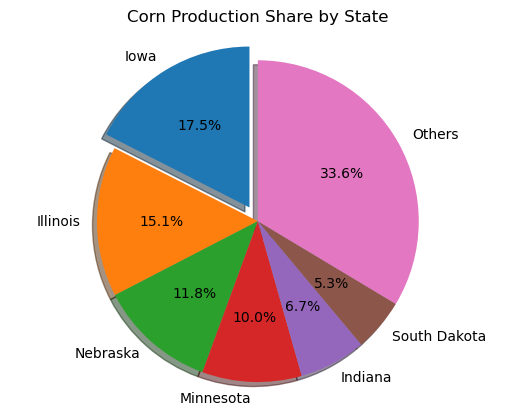

In [23]:
# Part 1.2: Data exploration
import matplotlib.pyplot as plt

'Corn production share pie chart'
labels = 'Iowa', 'Illinois', 'Nebraska', 'Minnesota', 'Indiana', 'South Dakota', 'Others'
sizes = [17.5, 15.1, 11.8, 10, 6.7, 5.3, 33.6]
explode = (0.1, 0, 0, 0, 0, 0, 0)  # only "explode" the 1st slice
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax1.set_title("Corn Production Share by State")  # Adding a title to the pie chart
plt.show()

In [24]:
# Ensure 'day' column is converted to datetime and set as index
df_analysis = df_final.copy()
df_analysis['Date'] = pd.to_datetime(df_analysis['day'])
df_analysis.set_index('Date', inplace=True)

# Defining the function to assign decades
def assign_decade(year):
    if 1990 <= year <= 1999:
        return '1990-1999'
    elif 2000 <= year <= 2009:
        return '2000-2009'
    elif 2010 <= year <= 2019:
        return '2010-2019'
    elif year == 2020:
        return '2020-2020'
    else:
        return 'Other'

# Apply the decade assignment using the correct datetime index
df_analysis['Decade'] = df_analysis.index.map(lambda date: assign_decade(date.year))

# Check the result
print(df_analysis['Decade'].unique())


['1990-1999' '2000-2009' '2010-2019' '2020-2020']


In [25]:
import matplotlib.pyplot as plt

# Group by 'Region' and 'Decade', then calculate the mean temperature
avg_temp = df_analysis.groupby(['Region', 'Decade'])['avg_temp_c'].mean().unstack()

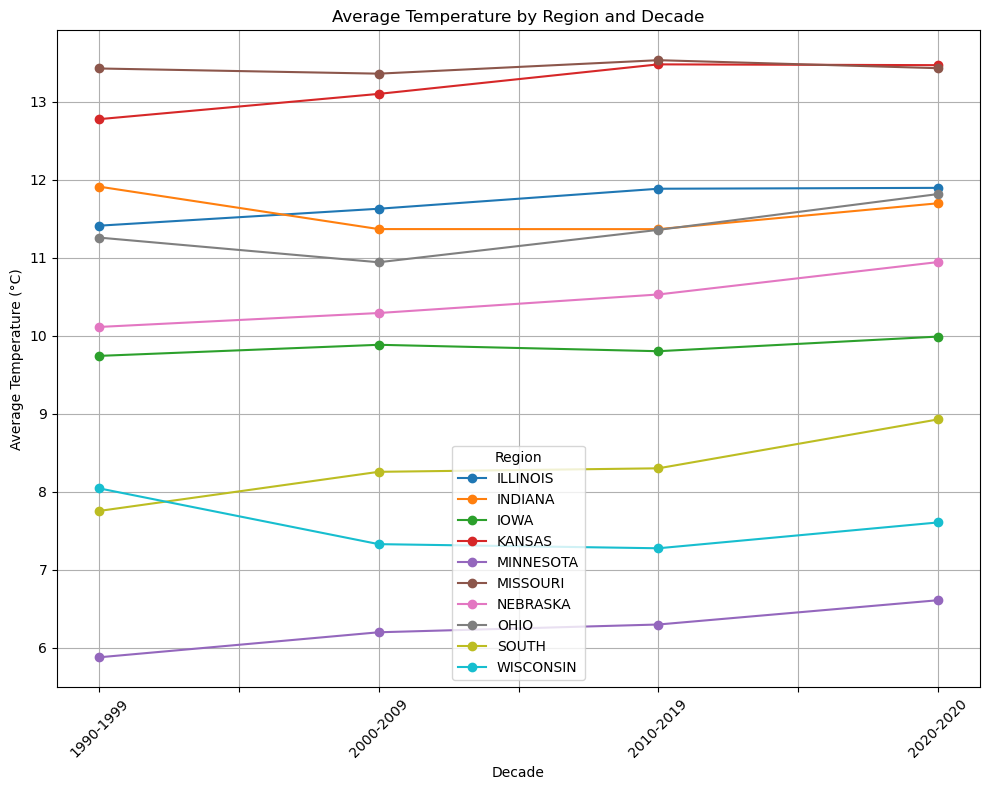

In [26]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting the average temperature for each region by decade
avg_temp.T.plot(ax=ax, marker='o')  # Transpose to have decades on the x-axis

ax.set_title('Average Temperature by Region and Decade')
ax.set_xlabel('Decade')
ax.set_ylabel('Average Temperature (°C)')
ax.grid(True)
ax.legend(title='Region')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

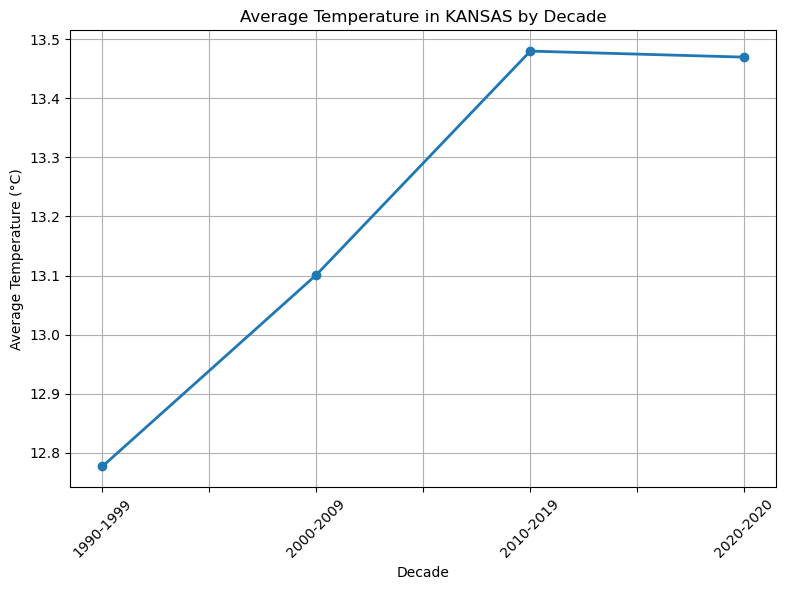

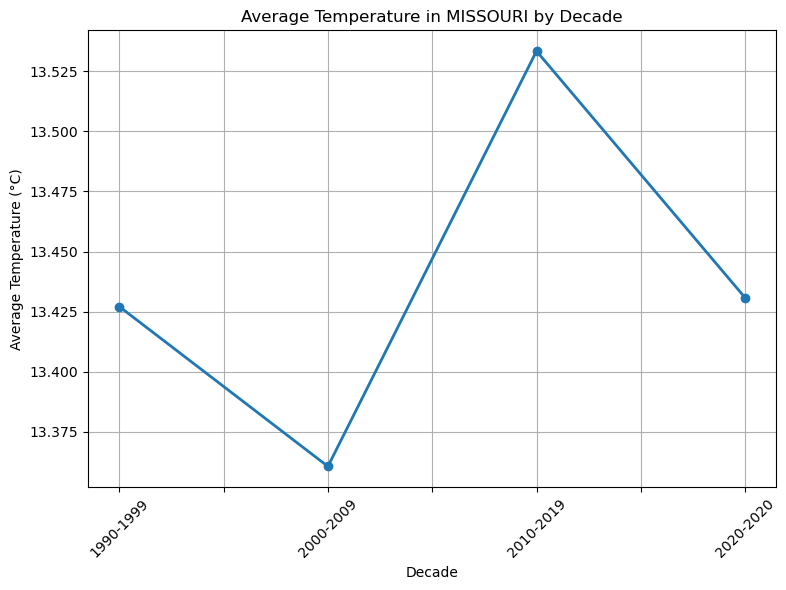

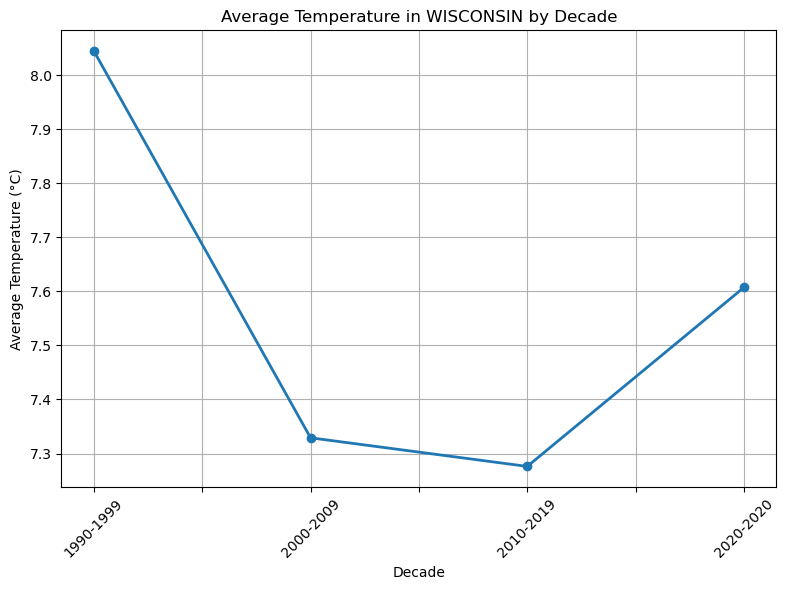

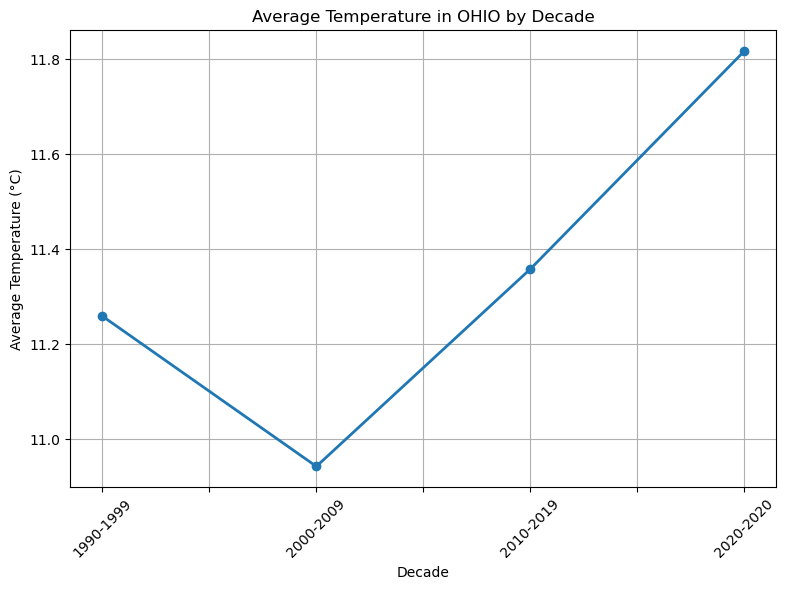

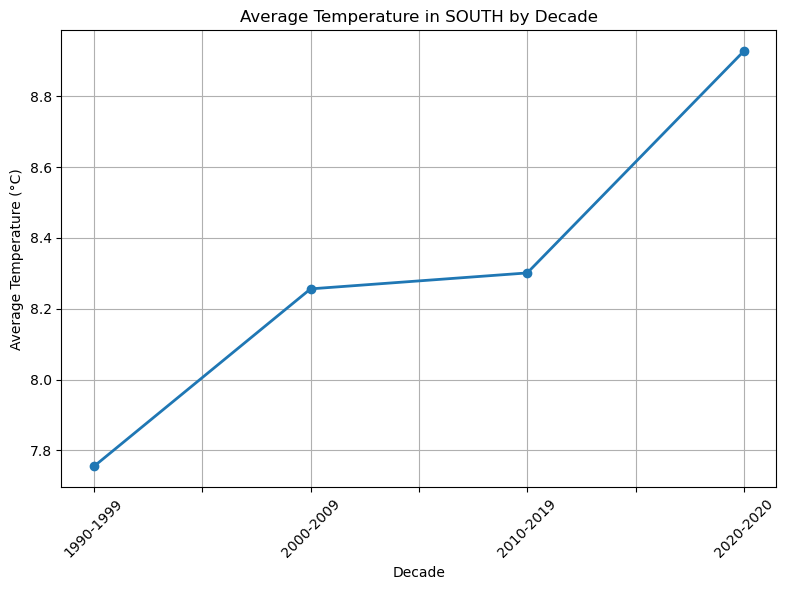

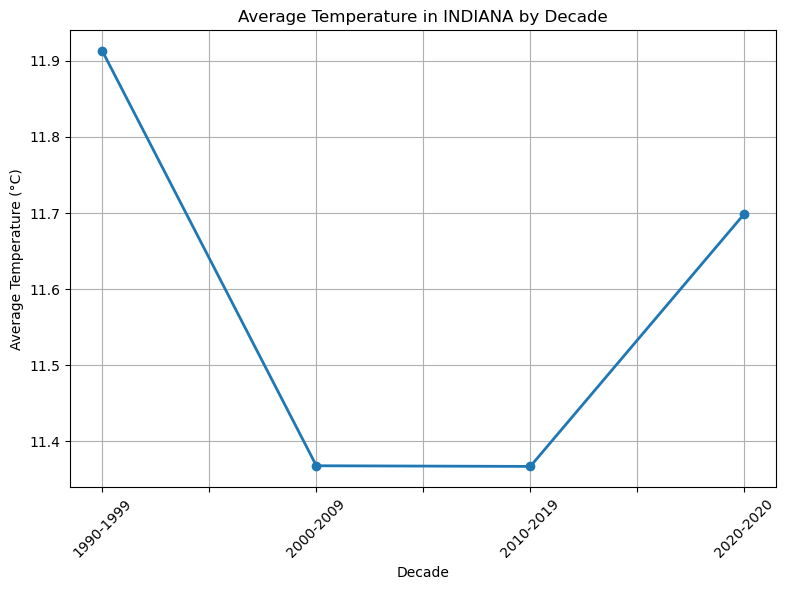

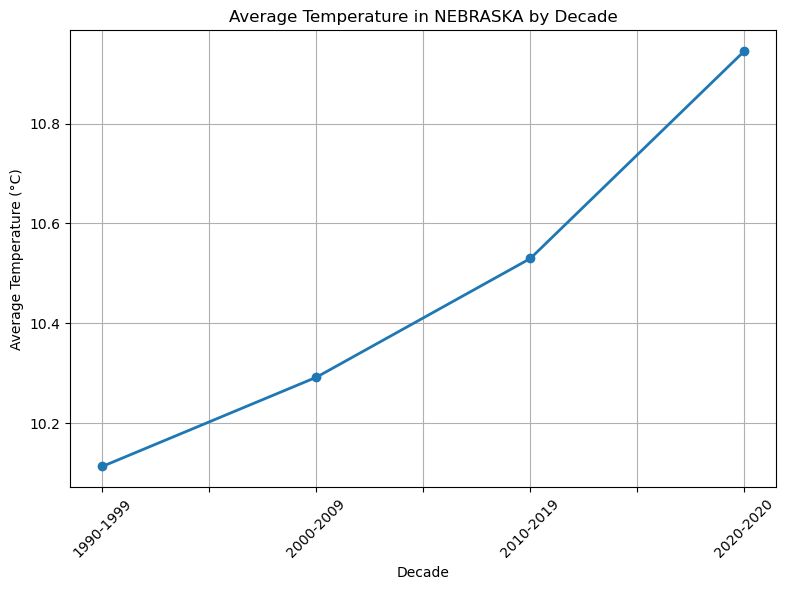

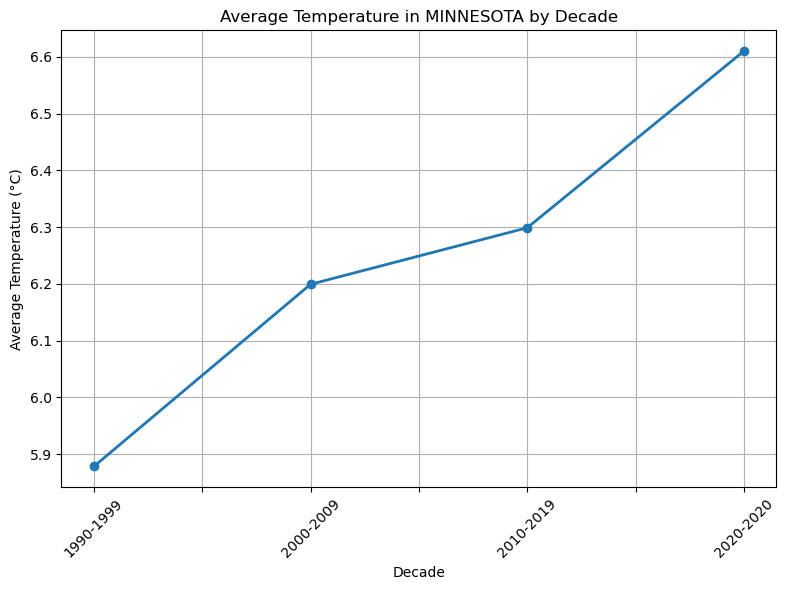

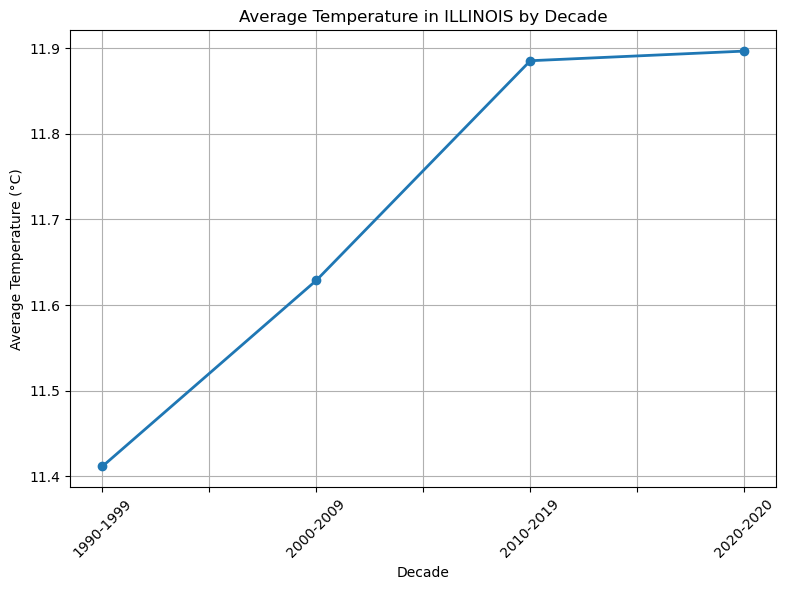

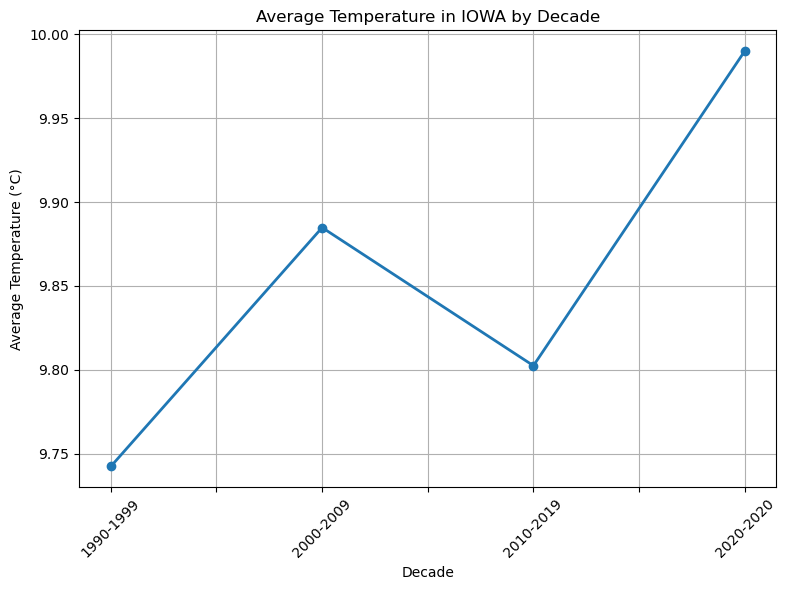

In [27]:
# Create a plot for each region
regions = df_analysis['Region'].unique()
for region in regions:
    fig, ax = plt.subplots(figsize=(8, 6))
    region_data = df_analysis[df_analysis['Region'] == region]
    region_decade_avg = region_data.groupby(['Decade'])['avg_temp_c'].mean()
    region_decade_avg.plot(ax=ax, marker='o', linestyle='-', linewidth=2.0)

    ax.set_title(f'Average Temperature in {region} by Decade')
    ax.set_xlabel('Decade')
    ax.set_ylabel('Average Temperature (°C)')
    ax.grid(True)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [28]:
# Part 2: Data Preprocessing

# Lag of the data to account for seasonality of the corn future

# Definition of a metric

from sklearn.metrics import mean_squared_error


In [29]:
# Number the number of lags
number_of_lags = 20

# Create a list to store lagged features for each station
lagged_features = []

# Iterate over each station group
for name, group in df_analysis.groupby('station'):
    # Create lagged features for the 'Price' column within each group
    lagged_price = pd.concat([group['Price'].shift(lag).rename(f'price_lag{lag}') for lag in range(1, number_of_lags + 1)], axis=1)
    
    # Concatenate station identifier and lagged features
    lagged_features.append(pd.concat([group[['day','Price','station']], lagged_price], axis=1))

# Concatenate all station groups back together
df_final_with_lags = pd.concat(lagged_features)

# Reset the index of the resulting DataFrame
df_final_with_lags.reset_index(drop=True, inplace=True)
df_final_with_lags

,day,Price,station,price_lag1,price_lag2,price_lag3,price_lag4,price_lag5,price_lag6,price_lag7,...,price_lag11,price_lag12,price_lag13,price_lag14,price_lag15,price_lag16,price_lag17,price_lag18,price_lag19,price_lag20
0,2009-11-15,390.50,04W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-11-16,402.25,04W,390.50,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-11-17,402.00,04W,402.25,390.50,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-11-18,398.00,04W,402.00,402.25,390.50,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-11-19,395.00,04W,398.00,402.00,402.25,390.50,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482067,2020-12-27,451.00,ZZV,451.00,451.00,451.00,447.25,443.50,440.00,437.50,...,427.25,424.75,419.25,424.25,424.25,424.25,420.25,422.00,417.00,419.50
4482068,2020-12-28,456.50,ZZV,451.00,451.00,451.00,451.00,447.25,443.50,440.00,...,432.50,427.25,424.75,419.25,424.25,424.25,424.25,420.25,422.00,417.00
4482069,2020-12-29,466.00,ZZV,456.50,451.00,451.00,451.00,451.00,447.25,443.50,...,437.50,432.50,427.25,424.75,419.25,424.25,424.25,424.25,420.25,422.00
4482070,2020-12-30,474.50,ZZV,466.00,456.50,451.00,451.00,451.00,451.00,447.25,...,437.50,437.50,432.50,427.25,424.75,419.25,424.25,424.25,424.25,420.25


In [30]:
# Convert date column to datetime if it's not already and set it as index
df_final_with_lags['date'] = pd.to_datetime(df_final_with_lags['day'])  # Convert 'day' to datetime and store in a new column 'date'
df_final_with_lags.set_index('date', inplace=True)        # Set 'date' as the new index

# Divide for training and validation
split_date = pd.Timestamp('2017-01-01')  # Replace with your actual split date

# Now you can slice using the Timestamp on df
train_df = df_final_with_lags[df_final_with_lags.index < split_date].dropna()
test_df = df_final_with_lags[df_final_with_lags.index >= split_date].dropna()

In [31]:
from sklearn.linear_model import LinearRegression

# Dictionary to store results
results = {}

for lag in range(1, number_of_lags + 1):
    # Train model
    model = LinearRegression()
    model.fit(train_df[[f'price_lag{lag}']], train_df['Price'])
    
    # Test model
    test_predictions = model.predict(test_df[[f'price_lag{lag}']])
    
    # Calculate and store error
    mse = mean_squared_error(test_df['Price'], test_predictions)
    results[f'price_lag{lag}'] = mse

# Find the lag with the minimum MSE
optimal_lag = min(results, key=results.get)
print(f"Optimal Lag: {optimal_lag}, MSE: {results[optimal_lag]}")

Optimal Lag: price_lag1, MSE: 17.187576293945312


In [32]:
from sklearn.preprocessing import StandardScaler

# Optionally, standardize the target and rerun the analysis to compare MSEs on a standardized scale
scaler = StandardScaler()
train_df_scaled = scaler.fit_transform(train_df['Price'].values.reshape(-1, 1)).flatten()
test_df_scaled = scaler.transform(test_df['Price'].values.reshape(-1, 1)).flatten()

results_scaled = {}
for lag in range(1, number_of_lags + 1):
    model.fit(train_df[[f'price_lag{lag}']], train_df_scaled)
    test_predictions_scaled = model.predict(test_df[[f'price_lag{lag}']])
    mse_scaled = mean_squared_error(test_df_scaled, test_predictions_scaled)
    results_scaled[f'price_lag{lag}'] = mse_scaled

optimal_lag_scaled = min(results_scaled, key=results_scaled.get)
print(f"Optimal Lag on scaled data: {optimal_lag_scaled}, MSE: {results_scaled[optimal_lag_scaled]}")

Optimal Lag on scaled data: price_lag1, MSE: 0.0006995772127993405


In [33]:
from sklearn.model_selection import TimeSeriesSplit

# Ensuring df_v1 is a DataFrame and performing a TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(df_final):
    cv_train = df_final.iloc[train_index]
    cv_test = df_final.iloc[test_index]
    # Perform your model training and evaluation here


In [34]:
# Use Lasso regression to identify combination of lag features
# Define a list of feature names
# Includes all column names used as features for modeling
features = [col for col in train_df.columns if 'lag' in col]  # This assumes all your features contain 'lag' in their name


In [35]:
# Ensure that your train_set DataFrame includes the 'price' column as the target variable
X_train = train_df[features]
y_train = train_df['Price']


In [36]:
from sklearn.linear_model import LassoCV

# Fit the LassoCV model
lasso = LassoCV(cv=5).fit(X_train, y_train)

# Identify important features based on the Lasso coefficients
important_features = [feature for feature, coef in zip(features, lasso.coef_) if coef != 0]

print(f"Important features based on Lasso: {important_features}")


Important features based on Lasso: ['price_lag1', 'price_lag3']


In [37]:
# # Final dataset with lagged prices
# # Convert 'date' to datetime type if not already
df_final.drop(columns=['Region'], inplace=True, errors='ignore')

df_final['date'] = pd.to_datetime(df_final['day'])
df_final = df_final.drop(columns=['day'])

# Sort the data to ensure correct lagging
df_final.sort_values(by=['date','station'], inplace=True)
df_final.reset_index(drop=True, inplace=True)
df_final

,Price,station,precip_cm,avg_temp_c,date
0,239.75,2WX,0.000000,-1.111111,1990-01-01
1,239.75,9V9,0.000000,-2.777778,1990-01-01
2,239.75,ABR,0.000000,-9.444445,1990-01-01
3,239.75,AIA,0.000000,2.222222,1990-01-01
4,239.75,AIG,0.000000,1.944444,1990-01-01
...,...,...,...,...,...
4482067,484.00,Y51,0.000000,-7.361111,2020-12-31
4482068,484.00,Y63,0.000000,-9.444445,2020-12-31
4482069,484.00,YKN,0.000254,-9.166667,2020-12-31
4482070,484.00,YNG,0.152400,-0.277778,2020-12-31


In [38]:
lag = 1  # This sets lags at 1

lagged_features = []

# Iterate over each station group
for name, group in df_final.groupby('station'):
    # Create lagged features for the 'Price' and 'Temperature' columns within each group
    # Generating lagged prices and temperatures
    lagged_price = pd.concat([group['Price'].shift(lag).rename(f'price_lag{lag}') ], axis=1)
    lagged_temp = pd.concat([group['avg_temp_c'].shift(lag).rename(f'temp_lag{lag}') ], axis=1)
    lagged_precip = pd.concat([group['precip_cm'].shift(lag).rename(f'precip_lag{lag}')], axis=1)

    # Concatenate the lagged prices and temperatures
    lagged_data = pd.concat([lagged_price, lagged_temp, lagged_precip], axis=1)

    # Concatenate station identifier and lagged features
    lagged_features.append(pd.concat([group[['date', 'station','avg_temp_c']], lagged_data], axis=1))

# Concatenate all station groups back together to form the final dataset with lags
df1 = pd.concat(lagged_features)

# This fills the first entry of each date where the shift results in a NaN for any station
df1.fillna(method='ffill', inplace=True)

# Sort the DataFrame by date to ensure chronological order
df1.sort_values(by='date', inplace=True)

# Display the first few rows of the final DataFrame to verify
df1

,date,station,avg_temp_c,price_lag1,temp_lag1,precip_lag1
50,1990-01-01,DYT,-7.500000,474.5,-4.500000,0.000000
127,1990-01-01,OLU,-3.055556,474.5,-9.000000,0.025400
77,1990-01-01,HLC,1.111111,474.5,5.000000,0.558800
58,1990-01-01,FDY,-0.833333,474.5,-8.055555,0.000254
64,1990-01-01,FOE,-2.777778,474.5,-6.944445,0.000254
...,...,...,...,...,...,...
4481952,2020-12-31,PRO,-8.166667,474.5,-4.250000,0.000000
4481951,2020-12-31,PQN,-8.500000,474.5,-6.000000,0.000000
4481643,2020-12-31,D39,-10.416667,474.5,-12.166667,0.000000
4481640,2020-12-31,CWI,-5.000000,474.5,-4.138889,0.965200


In [39]:
# Drop rows with any missing values
df1.dropna(inplace=True)
df1

,date,station,avg_temp_c,price_lag1,temp_lag1,precip_lag1
50,1990-01-01,DYT,-7.500000,474.5,-4.500000,0.000000
127,1990-01-01,OLU,-3.055556,474.5,-9.000000,0.025400
77,1990-01-01,HLC,1.111111,474.5,5.000000,0.558800
58,1990-01-01,FDY,-0.833333,474.5,-8.055555,0.000254
64,1990-01-01,FOE,-2.777778,474.5,-6.944445,0.000254
...,...,...,...,...,...,...
4481952,2020-12-31,PRO,-8.166667,474.5,-4.250000,0.000000
4481951,2020-12-31,PQN,-8.500000,474.5,-6.000000,0.000000
4481643,2020-12-31,D39,-10.416667,474.5,-12.166667,0.000000
4481640,2020-12-31,CWI,-5.000000,474.5,-4.138889,0.965200


In [40]:
# Calculate the 'anticipated weather' using a rolling window of the last 2 years (730 days)
df1['anticipated_temp'] = df1.groupby('station')['avg_temp_c'].transform(lambda x: x.rolling(window=730, min_periods=1).mean())

# Calculate the 'unanticipated weather' as the difference between the actual and anticipated values
df1['unanticipated_temp'] = df1['avg_temp_c'] - df1['anticipated_temp']

# Display the new DataFrame to verify the changes
df1

,date,station,avg_temp_c,price_lag1,temp_lag1,precip_lag1,anticipated_temp,unanticipated_temp
50,1990-01-01,DYT,-7.500000,474.5,-4.500000,0.000000,-7.500000,0.000000
127,1990-01-01,OLU,-3.055556,474.5,-9.000000,0.025400,-3.055556,0.000000
77,1990-01-01,HLC,1.111111,474.5,5.000000,0.558800,1.111111,0.000000
58,1990-01-01,FDY,-0.833333,474.5,-8.055555,0.000254,-0.833333,0.000000
64,1990-01-01,FOE,-2.777778,474.5,-6.944445,0.000254,-2.777778,0.000000
...,...,...,...,...,...,...,...,...
4481952,2020-12-31,PRO,-8.166667,474.5,-4.250000,0.000000,9.148820,-17.315487
4481951,2020-12-31,PQN,-8.500000,474.5,-6.000000,0.000000,7.203729,-15.703729
4481643,2020-12-31,D39,-10.416667,474.5,-12.166667,0.000000,5.770129,-16.186796
4481640,2020-12-31,CWI,-5.000000,474.5,-4.138889,0.965200,9.753349,-14.753349


In [41]:
# Change the index as date and station and conversion of integers as floating
df_final1 = df1.set_index(['date','station']).astype('float32')
df_final1

avg_temp_c  price_lag1  temp_lag1  precip_lag1  \
date       station                                                   
1990-01-01 DYT       -7.500000       474.5  -4.500000     0.000000   
           OLU       -3.055556       474.5  -9.000000     0.025400   
           HLC        1.111111       474.5   5.000000     0.558800   
           FDY       -0.833333       474.5  -8.055555     0.000254   
           FOE       -2.777778       474.5  -6.944445     0.000254   
...                        ...         ...        ...          ...   
2020-12-31 PRO       -8.166667       474.5  -4.250000     0.000000   
           PQN       -8.500000       474.5  -6.000000     0.000000   
           D39      -10.416667       474.5 -12.166667     0.000000   
           CWI       -5.000000       474.5  -4.138889     0.965200   
           ZZV        1.111111       474.5   6.111111     0.584200   

                    anticipated_temp  unanticipated_temp  
date       station                                        
1990-01-01 DYT             -7.500000            0.000000  
           OLU             -3.055556            0.000000  
           HLC              1.111111            0.000000  
           FDY             -0.833333            0.000000  
           FOE             -2.777778            0.000000  
...                              ...                 ...  
2020-12-31 PRO              9.148820          -17.315487  
           PQN              7.203729          -15.703729  
           D39              5.770129          -16.186796  
           CWI              9.753348          -14.753348  
           ZZV             12.190372          -11.079262  

[4482071 rows x 6 columns]

In [42]:
# Part 3: Creation of models for price prediction

# Fix random seed to ensure reproductability
np.random.seed(2308)

In [43]:
# Selection of relevant features
features = ['price_lag1','temp_lag1','precip_lag1','anticipated_temp','unanticipated_temp']
data = df_final1[features].values
# Had to take out 'anticipated_precip' and 'unanticipated_precip'
# to avoid problems later in the training

In [44]:
from sklearn.preprocessing import MinMaxScaler

# Normalization of the dataset
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

# Splitting of training and testing sets
# 80% of the data for training and 20% for testing
training_size = int(len(data) * 0.80)
training_data, testing_data = data[:training_size], data[training_size:]

In [45]:
# Scale the data
training_scaled = scaler_X.fit_transform(training_data)
testing_scaled = scaler_X.transform(testing_data)

In [46]:
# Creation of a function that creates two datasets at t and t+1 
# for the training and the testing 

def create_dataset(data, look_back, look_forward):
    X, y = [], []
    for i in range(len(data) - look_back - look_forward + 1):  # Enough data for the last sequence
        end_ix = i + look_back
        out_end_ix = end_ix + look_forward - 1
        if out_end_ix >= len(data):
            break  # Break if out_end_ix is beyond the dataset
        X.append(data[i:end_ix, :])  # Input features
        y.append(data[out_end_ix, 0])  # Output feature, assuming the target is at index 0
    return np.array(X), np.array(y)

In [47]:
look_back = 10  
look_forward = 1  

# # Create sequences using the provided function
# X_train, y_train = create_dataset(training_scaled, look_back, look_forward)
# X_test, y_test = create_dataset(testing_scaled, look_back, look_forward)
# Create sequences using the provided function
X_train, y_train = create_dataset(training_scaled, look_back, look_forward)
X_test, y_test = create_dataset(testing_scaled, look_back, look_forward)

# Fit the scaler on the target data
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [48]:
# Reshape the data to fit the LSTM input requirements
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], len(features))) # (samples, timesteps, features)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], len(features)))


print("X shape:", X_train.shape)
print("x shape:", X_test.shape)

X shape: (3585646, 10, 5)
x shape: (896405, 10, 5)


In [49]:
# Build model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

model = Sequential([
    LSTM(64, input_shape=(look_back, len(features)), return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),  # Typically false on the last LSTM if not followed by more RNN layers
    Dropout(0.2),
    Dense(1)
])

# Compile the model with Mean Squared Error loss and Adam optimizer
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [50]:
# Compile the model with Mean Squared Error loss and Adam optimizer
from tensorflow.keras.optimizers import Adam

optimizer = Adam()
# (learning_rate=0.0000001, clipvalue=0.5)  # clipvalue clips gradients by value
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [51]:
# Define early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) #After how many epochs to stop 
                                                                                          # after the model stops improving

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=10, batch_size=1024, verbose=1, callbacks=[early_stopping])

Epoch 1/10
3502/3502 [==============================] - 326s 91ms/step - loss: 0.0010 - mae: 0.0184 - val_loss: 9.5674e-06 - val_mae: 0.0026
Epoch 2/10
3502/3502 [==============================] - 305s 87ms/step - loss: 5.1024e-04 - mae: 0.0145 - val_loss: 1.0025e-05 - val_mae: 0.0028
Epoch 3/10
3502/3502 [==============================] - 310s 88ms/step - loss: 5.0173e-04 - mae: 0.0143 - val_loss: 3.6521e-06 - val_mae: 0.0012
Epoch 4/10
3502/3502 [==============================] - 302s 86ms/step - loss: 4.9644e-04 - mae: 0.0142 - val_loss: 1.4797e-05 - val_mae: 0.0036
Epoch 5/10
3502/3502 [==============================] - 307s 88ms/step - loss: 4.9303e-04 - mae: 0.0142 - val_loss: 5.0847e-06 - val_mae: 0.0017
Epoch 6/10
3502/3502 [==============================] - 313s 89ms/step - loss: 4.9216e-04 - mae: 0.0142 - val_loss: 6.2429e-06 - val_mae: 0.0020


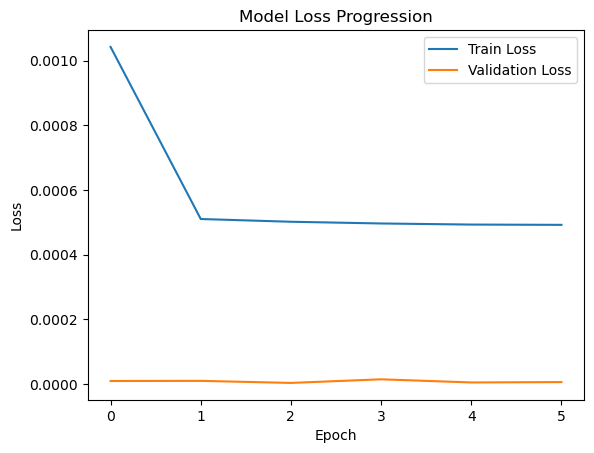

In [52]:
# Evaluate the model
# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [53]:
# Make predictions on the training and testing set
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


28013/28013 [==============================] - 165s 6ms/step


In [54]:
# Reshape y_train and y_test to 2D arrays
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

# Apply the inverse transformation
y_test_inverse = scaler.inverse_transform(y_test_reshaped)
test_predictions_inverse = scaler.inverse_transform(test_predictions)

In [55]:
# Extract dates from the index
dates = df_final1.index.values
# Ensure dates are in a correct format if they are tuples
if isinstance(dates[0], tuple):
    dates = [d[0] for d in dates]

# Convert dates to datetime if they are not already
dates = pd.to_datetime(dates)
training_dates, testing_dates = dates[:training_size], dates[training_size:]
test_dates = pd.to_datetime(testing_dates)
test_dates = test_dates[:len(y_test_inverse)]

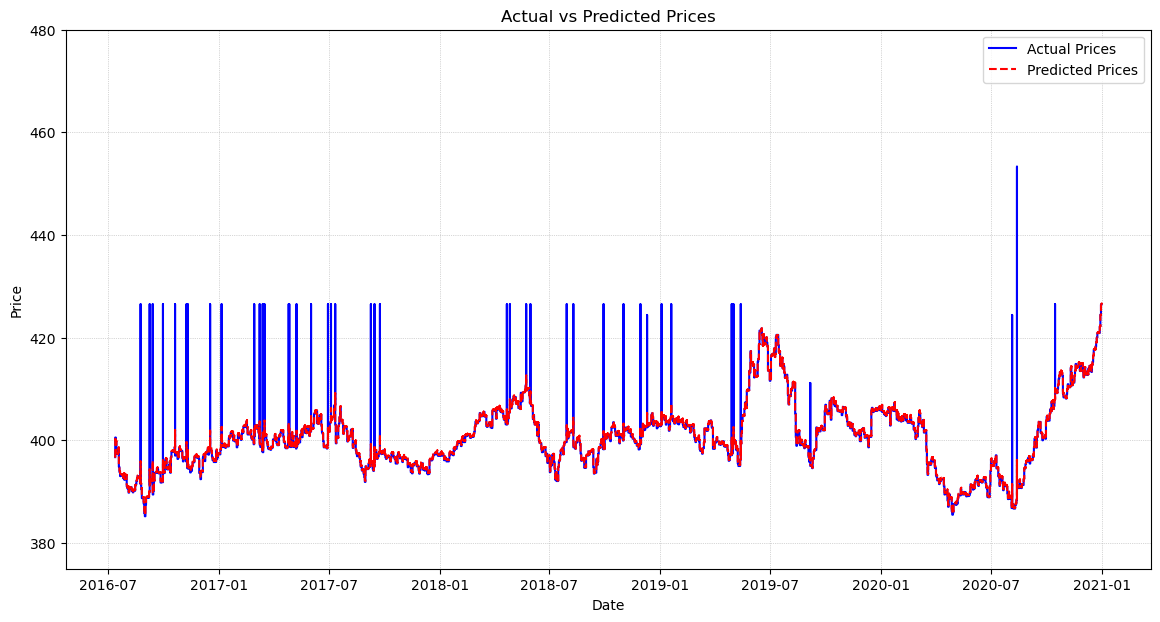

In [56]:
# Plot the predictions vs the actual values

plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test_inverse, color='blue', label='Actual Prices')
plt.plot(test_dates, test_predictions_inverse, color='red', linestyle='dashed', label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')

# Set grid with larger spacing and dotted lines
plt.ylim(375, 480)
plt.grid(True, which='both', linestyle=':', linewidth=0.5)

plt.legend()
plt.show()

# Model shows good predicted values. There is some mistake in the reshaping of the data when doing the inverse transormation.
# This creates these weird blue lines. This could be due to the fact that not all stations have data for all years 
# (some stop in 2012 or others may start in 2017).

5/5 [==============================] - 0s 7ms/step


Using 150 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|                                                                                          | 0/150 [00:00<?, ?it/s]

2344/2344 [==============================] - 13s 5ms/step


  1%|▌                                                                                 | 1/150 [00:14<36:46, 14.81s/it]

2344/2344 [==============================] - 13s 5ms/step


  1%|█                                                                                 | 2/150 [00:29<36:35, 14.83s/it]

2344/2344 [==============================] - 14s 6ms/step


  2%|█▋                                                                                | 3/150 [00:45<37:32, 15.32s/it]

2344/2344 [==============================] - 16s 7ms/step


  3%|██▏                                                                               | 4/150 [01:03<40:00, 16.44s/it]

2344/2344 [==============================] - 16s 7ms/step


  3%|██▋                                                                               | 5/150 [01:21<40:44, 16.86s/it]

2344/2344 [==============================] - 13s 6ms/step


  4%|███▎                                                                              | 6/150 [01:36<39:04, 16.28s/it]

2344/2344 [==============================] - 15s 6ms/step


  5%|███▊                                                                              | 7/150 [01:53<39:08, 16.42s/it]

2344/2344 [==============================] - 17s 7ms/step


  5%|████▎                                                                             | 8/150 [02:12<40:49, 17.25s/it]

2344/2344 [==============================] - 17s 7ms/step


  6%|████▉                                                                             | 9/150 [02:30<41:33, 17.68s/it]

2344/2344 [==============================] - 14s 6ms/step


  7%|█████▍                                                                           | 10/150 [02:46<39:57, 17.12s/it]

2344/2344 [==============================] - 14s 6ms/step


  7%|█████▉                                                                           | 11/150 [03:02<38:47, 16.75s/it]

2344/2344 [==============================] - 14s 6ms/step


  8%|██████▍                                                                          | 12/150 [03:18<37:55, 16.49s/it]

2344/2344 [==============================] - 13s 6ms/step


  9%|███████                                                                          | 13/150 [03:33<36:35, 16.02s/it]

2344/2344 [==============================] - 15s 6ms/step


  9%|███████▌                                                                         | 14/150 [03:49<36:30, 16.10s/it]

2344/2344 [==============================] - 16s 7ms/step


 10%|████████                                                                         | 15/150 [04:07<37:19, 16.59s/it]

2344/2344 [==============================] - 16s 7ms/step


 11%|████████▋                                                                        | 16/150 [04:25<38:04, 17.05s/it]

2344/2344 [==============================] - 16s 7ms/step


 11%|█████████▏                                                                       | 17/150 [04:43<38:13, 17.24s/it]

2344/2344 [==============================] - 16s 7ms/step


 12%|█████████▋                                                                       | 18/150 [05:00<37:51, 17.21s/it]

2344/2344 [==============================] - 18s 8ms/step


 13%|██████████▎                                                                      | 19/150 [05:19<39:00, 17.87s/it]

2344/2344 [==============================] - 16s 7ms/step


 13%|██████████▊                                                                      | 20/150 [05:37<38:51, 17.94s/it]

2344/2344 [==============================] - 14s 6ms/step


 14%|███████████▎                                                                     | 21/150 [05:53<37:08, 17.28s/it]

2344/2344 [==============================] - 15s 6ms/step


 15%|███████████▉                                                                     | 22/150 [06:10<36:26, 17.08s/it]

2344/2344 [==============================] - 13s 6ms/step


 15%|████████████▍                                                                    | 23/150 [06:25<35:01, 16.55s/it]

2344/2344 [==============================] - 11s 5ms/step


 16%|████████████▉                                                                    | 24/150 [06:38<32:27, 15.45s/it]

2344/2344 [==============================] - 14s 6ms/step


 17%|█████████████▌                                                                   | 25/150 [06:53<32:12, 15.46s/it]

2344/2344 [==============================] - 15s 6ms/step


 17%|██████████████                                                                   | 26/150 [07:10<32:33, 15.75s/it]

2344/2344 [==============================] - 15s 7ms/step


 18%|██████████████▌                                                                  | 27/150 [07:27<33:02, 16.12s/it]

2344/2344 [==============================] - 15s 6ms/step


 19%|███████████████                                                                  | 28/150 [07:43<32:47, 16.13s/it]

2344/2344 [==============================] - 16s 7ms/step


 19%|███████████████▋                                                                 | 29/150 [08:00<33:20, 16.53s/it]

2344/2344 [==============================] - 15s 7ms/step


 20%|████████████████▏                                                                | 30/150 [08:17<33:19, 16.67s/it]

2344/2344 [==============================] - 14s 6ms/step


 21%|████████████████▋                                                                | 31/150 [08:33<32:22, 16.32s/it]

2344/2344 [==============================] - 13s 6ms/step


 21%|█████████████████▎                                                               | 32/150 [08:48<31:21, 15.94s/it]

2344/2344 [==============================] - 14s 6ms/step


 22%|█████████████████▊                                                               | 33/150 [09:04<31:00, 15.90s/it]

2344/2344 [==============================] - 14s 6ms/step


 23%|██████████████████▎                                                              | 34/150 [09:19<30:33, 15.81s/it]

2344/2344 [==============================] - 14s 6ms/step


 23%|██████████████████▉                                                              | 35/150 [09:35<30:20, 15.83s/it]

2344/2344 [==============================] - 14s 6ms/step


 24%|███████████████████▍                                                             | 36/150 [09:51<29:52, 15.73s/it]

2344/2344 [==============================] - 13s 6ms/step


 25%|███████████████████▉                                                             | 37/150 [10:06<29:12, 15.51s/it]

2344/2344 [==============================] - 13s 6ms/step


 25%|████████████████████▌                                                            | 38/150 [10:21<28:37, 15.33s/it]

2344/2344 [==============================] - 12s 5ms/step


 26%|█████████████████████                                                            | 39/150 [10:35<27:35, 14.91s/it]

2344/2344 [==============================] - 12s 5ms/step


 27%|█████████████████████▌                                                           | 40/150 [10:48<26:30, 14.46s/it]

2344/2344 [==============================] - 11s 5ms/step


 27%|██████████████████████▏                                                          | 41/150 [11:01<25:34, 14.08s/it]

2344/2344 [==============================] - 13s 6ms/step


 28%|██████████████████████▋                                                          | 42/150 [11:16<25:38, 14.24s/it]

2344/2344 [==============================] - 12s 5ms/step


 29%|███████████████████████▏                                                         | 43/150 [11:29<25:01, 14.03s/it]

2344/2344 [==============================] - 15s 6ms/step


 29%|███████████████████████▊                                                         | 44/150 [11:46<25:54, 14.66s/it]

2344/2344 [==============================] - 16s 7ms/step


 30%|████████████████████████▎                                                        | 45/150 [12:03<27:03, 15.46s/it]

2344/2344 [==============================] - 12s 5ms/step


 31%|████████████████████████▊                                                        | 46/150 [12:16<25:47, 14.88s/it]

2344/2344 [==============================] - 13s 5ms/step


 31%|█████████████████████████▍                                                       | 47/150 [12:31<25:22, 14.78s/it]

2344/2344 [==============================] - 11s 5ms/step


 32%|█████████████████████████▉                                                       | 48/150 [12:44<24:18, 14.30s/it]

2344/2344 [==============================] - 14s 6ms/step


 33%|██████████████████████████▍                                                      | 49/150 [13:00<25:00, 14.86s/it]

2344/2344 [==============================] - 12s 5ms/step


 33%|███████████████████████████                                                      | 50/150 [13:14<24:19, 14.59s/it]

2344/2344 [==============================] - 12s 5ms/step


 34%|███████████████████████████▌                                                     | 51/150 [13:27<23:24, 14.19s/it]

2344/2344 [==============================] - 11s 5ms/step


 35%|████████████████████████████                                                     | 52/150 [13:41<22:43, 13.91s/it]

2344/2344 [==============================] - 13s 6ms/step


 35%|████████████████████████████▌                                                    | 53/150 [13:55<22:49, 14.11s/it]

2344/2344 [==============================] - 15s 6ms/step


 36%|█████████████████████████████▏                                                   | 54/150 [14:12<23:47, 14.87s/it]

2344/2344 [==============================] - 14s 6ms/step


 37%|█████████████████████████████▋                                                   | 55/150 [14:28<23:59, 15.16s/it]

2344/2344 [==============================] - 13s 5ms/step


 37%|██████████████████████████████▏                                                  | 56/150 [14:42<23:26, 14.96s/it]

2344/2344 [==============================] - 13s 5ms/step


 38%|██████████████████████████████▊                                                  | 57/150 [14:57<22:54, 14.78s/it]

2344/2344 [==============================] - 13s 6ms/step


 39%|███████████████████████████████▎                                                 | 58/150 [15:12<22:49, 14.88s/it]

2344/2344 [==============================] - 12s 5ms/step


 39%|███████████████████████████████▊                                                 | 59/150 [15:25<21:58, 14.48s/it]

2344/2344 [==============================] - 12s 5ms/step


 40%|████████████████████████████████▍                                                | 60/150 [15:39<21:25, 14.28s/it]

2344/2344 [==============================] - 12s 5ms/step


 41%|████████████████████████████████▉                                                | 61/150 [15:53<20:50, 14.05s/it]

2344/2344 [==============================] - 12s 5ms/step


 41%|█████████████████████████████████▍                                               | 62/150 [16:07<20:38, 14.07s/it]

2344/2344 [==============================] - 14s 6ms/step


 42%|██████████████████████████████████                                               | 63/150 [16:23<21:13, 14.63s/it]

2344/2344 [==============================] - 11s 5ms/step


 43%|██████████████████████████████████▌                                              | 64/150 [16:35<20:05, 14.01s/it]

2344/2344 [==============================] - 12s 5ms/step


 43%|███████████████████████████████████                                              | 65/150 [16:49<19:46, 13.96s/it]

2344/2344 [==============================] - 11s 5ms/step


 44%|███████████████████████████████████▋                                             | 66/150 [17:02<19:12, 13.72s/it]

2344/2344 [==============================] - 12s 5ms/step


 45%|████████████████████████████████████▏                                            | 67/150 [17:16<19:06, 13.82s/it]

2344/2344 [==============================] - 12s 5ms/step


 45%|████████████████████████████████████▋                                            | 68/150 [17:30<18:56, 13.86s/it]

2344/2344 [==============================] - 12s 5ms/step


 46%|█████████████████████████████████████▎                                           | 69/150 [17:44<18:37, 13.79s/it]

2344/2344 [==============================] - 11s 5ms/step


 47%|█████████████████████████████████████▊                                           | 70/150 [17:57<17:59, 13.50s/it]

2344/2344 [==============================] - 11s 5ms/step


 47%|██████████████████████████████████████▎                                          | 71/150 [18:10<17:29, 13.29s/it]

2344/2344 [==============================] - 12s 5ms/step


 48%|██████████████████████████████████████▉                                          | 72/150 [18:23<17:16, 13.29s/it]

2344/2344 [==============================] - 13s 5ms/step


 49%|███████████████████████████████████████▍                                         | 73/150 [18:37<17:27, 13.60s/it]

2344/2344 [==============================] - 11s 5ms/step


 49%|███████████████████████████████████████▉                                         | 74/150 [18:50<16:59, 13.41s/it]

2344/2344 [==============================] - 11s 5ms/step


 50%|████████████████████████████████████████▌                                        | 75/150 [19:03<16:42, 13.37s/it]

2344/2344 [==============================] - 11s 5ms/step


 51%|█████████████████████████████████████████                                        | 76/150 [19:16<16:20, 13.25s/it]

2344/2344 [==============================] - 10s 4ms/step


 51%|█████████████████████████████████████████▌                                       | 77/150 [19:28<15:30, 12.75s/it]

2344/2344 [==============================] - 9s 4ms/step


 52%|██████████████████████████████████████████                                       | 78/150 [19:39<14:37, 12.18s/it]

2344/2344 [==============================] - 9s 4ms/step


 53%|██████████████████████████████████████████▋                                      | 79/150 [19:49<13:51, 11.71s/it]

2344/2344 [==============================] - 10s 4ms/step


 53%|███████████████████████████████████████████▏                                     | 80/150 [20:01<13:38, 11.70s/it]

2344/2344 [==============================] - 10s 4ms/step


 54%|███████████████████████████████████████████▋                                     | 81/150 [20:12<13:17, 11.55s/it]

2344/2344 [==============================] - 12s 5ms/step


 55%|████████████████████████████████████████████▎                                    | 82/150 [20:26<13:44, 12.12s/it]

2344/2344 [==============================] - 12s 5ms/step


 55%|████████████████████████████████████████████▊                                    | 83/150 [20:40<14:12, 12.72s/it]

2344/2344 [==============================] - 12s 5ms/step


 56%|█████████████████████████████████████████████▎                                   | 84/150 [20:54<14:24, 13.09s/it]

2344/2344 [==============================] - 11s 5ms/step


 57%|█████████████████████████████████████████████▉                                   | 85/150 [21:07<14:07, 13.03s/it]

2344/2344 [==============================] - 12s 5ms/step


 57%|██████████████████████████████████████████████▍                                  | 86/150 [21:20<14:01, 13.14s/it]

2344/2344 [==============================] - 12s 5ms/step


 58%|██████████████████████████████████████████████▉                                  | 87/150 [21:34<14:00, 13.34s/it]

2344/2344 [==============================] - 12s 5ms/step


 59%|███████████████████████████████████████████████▌                                 | 88/150 [21:48<13:57, 13.51s/it]

2344/2344 [==============================] - 13s 5ms/step


 59%|████████████████████████████████████████████████                                 | 89/150 [22:02<13:59, 13.77s/it]

2344/2344 [==============================] - 11s 5ms/step


 60%|████████████████████████████████████████████████▌                                | 90/150 [22:15<13:35, 13.59s/it]

2344/2344 [==============================] - 12s 5ms/step


 61%|█████████████████████████████████████████████████▏                               | 91/150 [22:29<13:21, 13.59s/it]

2344/2344 [==============================] - 11s 5ms/step


 61%|█████████████████████████████████████████████████▋                               | 92/150 [22:42<12:54, 13.35s/it]

2344/2344 [==============================] - 11s 5ms/step


 62%|██████████████████████████████████████████████████▏                              | 93/150 [22:54<12:28, 13.14s/it]

2344/2344 [==============================] - 11s 4ms/step


 63%|██████████████████████████████████████████████████▊                              | 94/150 [23:07<12:03, 12.92s/it]

2344/2344 [==============================] - 11s 4ms/step


 63%|███████████████████████████████████████████████████▎                             | 95/150 [23:19<11:37, 12.69s/it]

2344/2344 [==============================] - 11s 5ms/step


 64%|███████████████████████████████████████████████████▊                             | 96/150 [23:32<11:32, 12.82s/it]

2344/2344 [==============================] - 10s 4ms/step


 65%|████████████████████████████████████████████████████▍                            | 97/150 [23:44<11:02, 12.50s/it]

2344/2344 [==============================] - 11s 5ms/step


 65%|████████████████████████████████████████████████████▉                            | 98/150 [23:56<10:50, 12.51s/it]

2344/2344 [==============================] - 11s 5ms/step


 66%|█████████████████████████████████████████████████████▍                           | 99/150 [24:09<10:42, 12.60s/it]

2344/2344 [==============================] - 12s 5ms/step


 67%|█████████████████████████████████████████████████████▎                          | 100/150 [24:23<10:51, 13.04s/it]

2344/2344 [==============================] - 11s 5ms/step


 67%|█████████████████████████████████████████████████████▊                          | 101/150 [24:36<10:32, 12.90s/it]

2344/2344 [==============================] - 11s 5ms/step


 68%|██████████████████████████████████████████████████████▍                         | 102/150 [24:49<10:23, 13.00s/it]

2344/2344 [==============================] - 10s 4ms/step


 69%|██████████████████████████████████████████████████████▉                         | 103/150 [25:01<09:59, 12.75s/it]

2344/2344 [==============================] - 10s 4ms/step


 69%|███████████████████████████████████████████████████████▍                        | 104/150 [25:13<09:37, 12.55s/it]

2344/2344 [==============================] - 10s 4ms/step


 70%|████████████████████████████████████████████████████████                        | 105/150 [25:25<09:15, 12.35s/it]

2344/2344 [==============================] - 10s 4ms/step


 71%|████████████████████████████████████████████████████████▌                       | 106/150 [25:37<09:01, 12.30s/it]

2344/2344 [==============================] - 11s 5ms/step


 71%|█████████████████████████████████████████████████████████                       | 107/150 [25:50<08:58, 12.52s/it]

2344/2344 [==============================] - 11s 5ms/step


 72%|█████████████████████████████████████████████████████████▌                      | 108/150 [26:03<08:42, 12.45s/it]

2344/2344 [==============================] - 11s 5ms/step


 73%|██████████████████████████████████████████████████████████▏                     | 109/150 [26:15<08:30, 12.45s/it]

2344/2344 [==============================] - 11s 5ms/step


 73%|██████████████████████████████████████████████████████████▋                     | 110/150 [26:28<08:19, 12.50s/it]

2344/2344 [==============================] - 11s 4ms/step


 74%|███████████████████████████████████████████████████████████▏                    | 111/150 [26:40<08:06, 12.47s/it]

2344/2344 [==============================] - 12s 5ms/step


 75%|███████████████████████████████████████████████████████████▋                    | 112/150 [26:54<08:11, 12.94s/it]

2344/2344 [==============================] - 12s 5ms/step


 75%|████████████████████████████████████████████████████████████▎                   | 113/150 [27:08<08:03, 13.08s/it]

2344/2344 [==============================] - 11s 5ms/step


 76%|████████████████████████████████████████████████████████████▊                   | 114/150 [27:21<07:50, 13.08s/it]

2344/2344 [==============================] - 11s 5ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 115/150 [27:34<07:38, 13.11s/it]

2344/2344 [==============================] - 11s 4ms/step


 77%|█████████████████████████████████████████████████████████████▊                  | 116/150 [27:46<07:18, 12.89s/it]

2344/2344 [==============================] - 10s 4ms/step


 78%|██████████████████████████████████████████████████████████████▍                 | 117/150 [27:58<06:57, 12.66s/it]

2344/2344 [==============================] - 11s 5ms/step


 79%|██████████████████████████████████████████████████████████████▉                 | 118/150 [28:11<06:48, 12.78s/it]

2344/2344 [==============================] - 12s 5ms/step


 79%|███████████████████████████████████████████████████████████████▍                | 119/150 [28:25<06:42, 12.98s/it]

2344/2344 [==============================] - 11s 5ms/step


 80%|████████████████████████████████████████████████████████████████                | 120/150 [28:38<06:28, 12.95s/it]

2344/2344 [==============================] - 11s 5ms/step


 81%|████████████████████████████████████████████████████████████████▌               | 121/150 [28:51<06:16, 12.98s/it]

2344/2344 [==============================] - 12s 5ms/step


 81%|█████████████████████████████████████████████████████████████████               | 122/150 [29:04<06:05, 13.05s/it]

2344/2344 [==============================] - 12s 5ms/step


 82%|█████████████████████████████████████████████████████████████████▌              | 123/150 [29:17<05:52, 13.07s/it]

2344/2344 [==============================] - 12s 5ms/step


 83%|██████████████████████████████████████████████████████████████████▏             | 124/150 [29:31<05:43, 13.20s/it]

2344/2344 [==============================] - 12s 5ms/step


 83%|██████████████████████████████████████████████████████████████████▋             | 125/150 [29:44<05:29, 13.18s/it]

2344/2344 [==============================] - 12s 5ms/step


 84%|███████████████████████████████████████████████████████████████████▏            | 126/150 [29:57<05:17, 13.22s/it]

2344/2344 [==============================] - 12s 5ms/step


 85%|███████████████████████████████████████████████████████████████████▋            | 127/150 [30:11<05:08, 13.40s/it]

2344/2344 [==============================] - 13s 5ms/step


 85%|████████████████████████████████████████████████████████████████████▎           | 128/150 [30:25<05:01, 13.69s/it]

2344/2344 [==============================] - 12s 5ms/step


 86%|████████████████████████████████████████████████████████████████████▊           | 129/150 [30:39<04:47, 13.68s/it]

2344/2344 [==============================] - 12s 5ms/step


 87%|█████████████████████████████████████████████████████████████████████▎          | 130/150 [30:53<04:35, 13.78s/it]

2344/2344 [==============================] - 12s 5ms/step


 87%|█████████████████████████████████████████████████████████████████████▊          | 131/150 [31:07<04:21, 13.79s/it]

2344/2344 [==============================] - 12s 5ms/step


 88%|██████████████████████████████████████████████████████████████████████▍         | 132/150 [31:20<04:07, 13.77s/it]

2344/2344 [==============================] - 12s 5ms/step


 89%|██████████████████████████████████████████████████████████████████████▉         | 133/150 [31:34<03:55, 13.86s/it]

2344/2344 [==============================] - 12s 5ms/step


 89%|███████████████████████████████████████████████████████████████████████▍        | 134/150 [31:48<03:39, 13.74s/it]

2344/2344 [==============================] - 10s 4ms/step


 90%|████████████████████████████████████████████████████████████████████████        | 135/150 [32:00<03:18, 13.24s/it]

2344/2344 [==============================] - 10s 4ms/step


 91%|████████████████████████████████████████████████████████████████████████▌       | 136/150 [32:12<03:01, 12.93s/it]

2344/2344 [==============================] - 10s 4ms/step


 91%|█████████████████████████████████████████████████████████████████████████       | 137/150 [32:24<02:45, 12.71s/it]

2344/2344 [==============================] - 11s 4ms/step


 92%|█████████████████████████████████████████████████████████████████████████▌      | 138/150 [32:37<02:30, 12.56s/it]

2344/2344 [==============================] - 10s 4ms/step


 93%|██████████████████████████████████████████████████████████████████████████▏     | 139/150 [32:48<02:14, 12.27s/it]

2344/2344 [==============================] - 11s 4ms/step


 93%|██████████████████████████████████████████████████████████████████████████▋     | 140/150 [33:00<02:02, 12.22s/it]

2344/2344 [==============================] - 10s 4ms/step


 94%|███████████████████████████████████████████████████████████████████████████▏    | 141/150 [33:12<01:49, 12.12s/it]

2344/2344 [==============================] - 10s 4ms/step


 95%|███████████████████████████████████████████████████████████████████████████▋    | 142/150 [33:24<01:36, 12.12s/it]

2344/2344 [==============================] - 10s 4ms/step


 95%|████████████████████████████████████████████████████████████████████████████▎   | 143/150 [33:36<01:24, 12.04s/it]

2344/2344 [==============================] - 8s 3ms/step


 96%|████████████████████████████████████████████████████████████████████████████▊   | 144/150 [33:46<01:08, 11.34s/it]

2344/2344 [==============================] - 10s 4ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 145/150 [33:58<00:57, 11.49s/it]

2344/2344 [==============================] - 10s 4ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 146/150 [34:10<00:46, 11.65s/it]

2344/2344 [==============================] - 10s 4ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 147/150 [34:22<00:35, 11.75s/it]

2344/2344 [==============================] - 10s 4ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 148/150 [34:34<00:23, 11.81s/it]

2344/2344 [==============================] - 10s 4ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▍| 149/150 [34:46<00:11, 11.87s/it]

2344/2344 [==============================] - 10s 4ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [34:58<00:00, 13.99s/it]


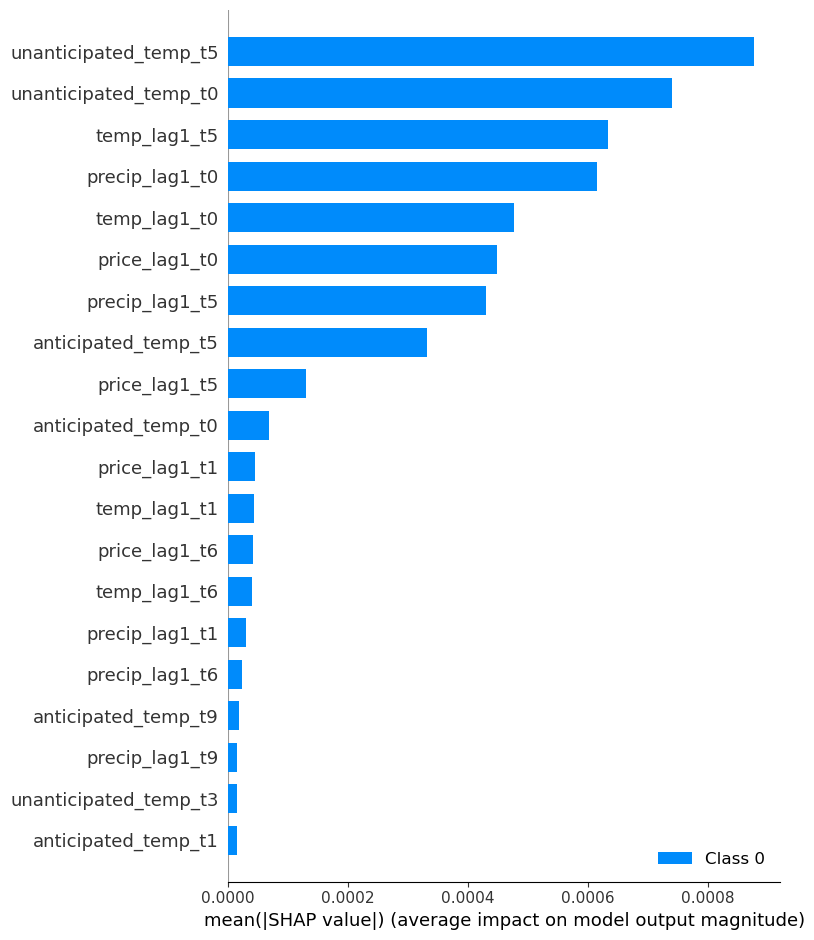

In [58]:
import shap

# Features and time steps
num_features = len(features)
num_time_steps = X_train.shape[1]

# Reduce the background sample size further
background_sample_size = 150  
background_sample = shap.sample(X_train, background_sample_size)

# Define a wrapper function for the model's predict method
def model_predict_wrapper(data):
    # Reshape the flat data back to the original 3D shape
    data_reshaped = data.reshape((data.shape[0], num_time_steps, num_features))
    return model.predict(data_reshaped)

# Initialize the SHAP KernelExplainer with the reduced background sample
explainer = shap.KernelExplainer(model_predict_wrapper, background_sample.reshape((background_sample_size, num_time_steps * num_features)))

# Select a smaller subset of X_test for demonstration purposes
test_sample_size = 150  
X_test_sample = X_test[:test_sample_size]
X_test_sample_flat = X_test_sample.reshape(X_test_sample.shape[0], -1)

# Compute SHAP values with a reduced number of samples
shap_values = explainer.shap_values(X_test_sample_flat, nsamples=500)  

# Plot the feature importance
shap.summary_plot(shap_values, X_test_sample_flat, feature_names=[f"{feature}_t{t}" for feature in features for t in range(num_time_steps)])